In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.set(style='whitegrid')

In [2]:
types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
data = pd.read_csv('../../data/train.csv', dtype = types)

data.head(2)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000


In [3]:
data.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

In [4]:
data = data.dropna(subset=["antiguedad"])
data.head(2)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,False,False,False,False,False,1200000


In [5]:
data["fecha"] = pd.to_datetime(data['fecha'])

In [6]:
data["fecha"]

1        2013-06-28
2        2015-10-17
3        2012-03-09
4        2016-06-07
5        2014-03-18
            ...    
239995   2015-02-08
239996   2014-07-10
239997   2015-03-03
239998   2014-12-26
239999   2015-06-19
Name: fecha, Length: 196445, dtype: datetime64[ns]

In [7]:
data.antiguedad

1         10.0
2          5.0
3          1.0
4         10.0
5          5.0
          ... 
239995     0.0
239996     0.0
239997    20.0
239998    20.0
239999     1.0
Name: antiguedad, Length: 196445, dtype: float32

In [8]:
data["antiguedad"] = data["antiguedad"] + (2016 - data["fecha"].dt.year)

In [9]:
data.antiguedad

1         13.0
2          6.0
3          5.0
4         10.0
5          7.0
          ... 
239995     1.0
239996     2.0
239997    21.0
239998    22.0
239999     2.0
Name: antiguedad, Length: 196445, dtype: float64

Text(0, 0.5, 'Cantidad de propiedades publicadas')

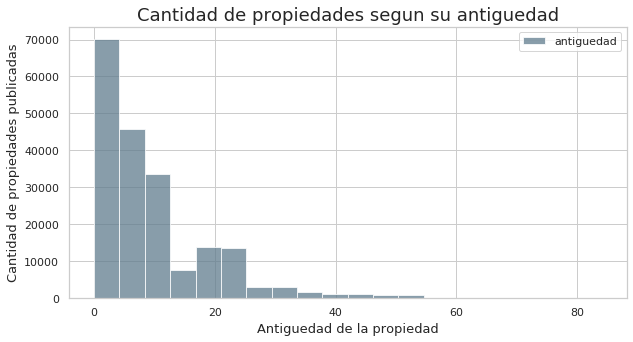

In [46]:
g = data['antiguedad'].to_frame().plot.hist(bins=20, color="#607c8e", grid=True, alpha = 0.75, figsize=(10,5))
g.set_title("Cantidad de propiedades segun su antiguedad", fontsize=18)
g.set_xlabel("Antiguedad de la propiedad", fontsize=13)
g.set_ylabel("Cantidad de propiedades publicadas", fontsize=13)

In [13]:
provincias_con_nuevas_prop = data.dropna(subset=["provincia"])[['provincia', 'antiguedad']]
provincias_con_nuevas_prop['count'] = 1
provincias_con_nuevas_prop = provincias_con_nuevas_prop.groupby(['antiguedad','provincia']).agg({'count': 'count'}).reset_index()
provincias_con_nuevas_prop = provincias_con_nuevas_prop[provincias_con_nuevas_prop['antiguedad'] == 0.0].sort_values('count', ascending = False)
provincias_con_nuevas_prop

,antiguedad,provincia,count
14,0.0,Jalisco,2425
8,0.0,Distrito Federal,2399
21,0.0,Querétaro,2273
10,0.0,Edo. de México,1418
20,0.0,Puebla,1394
18,0.0,Nuevo León,1172
30,0.0,Yucatán,1110
29,0.0,Veracruz,635
22,0.0,Quintana Roo,513
23,0.0,San luis Potosí,504


Text(0, 0.5, 'Provincia')

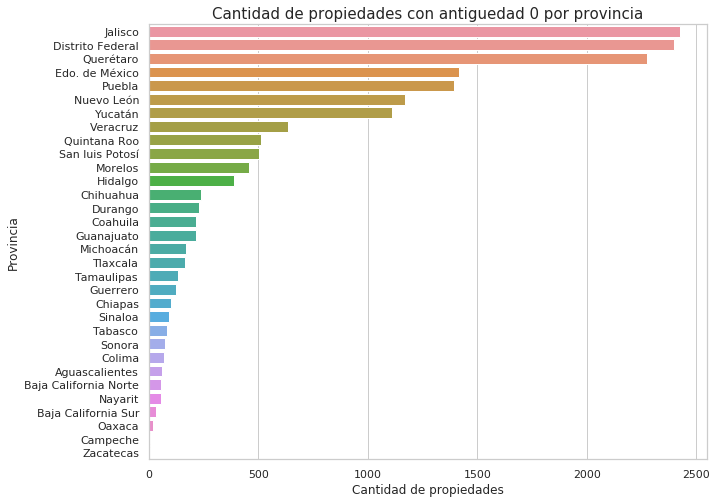

In [14]:
plt.figure(figsize = (10,8))
g = sns.barplot(x=provincias_con_nuevas_prop['count'], y=provincias_con_nuevas_prop['provincia'] )
g.set_title("Cantidad de propiedades con antiguedad 0 por provincia", fontsize=15)
g.set_xlabel("Cantidad de propiedades", fontsize=12)
g.set_ylabel("Provincia", fontsize=12)

In [49]:
df_ant = data[["antiguedad", "provincia"]]
df_ant = df_ant[df_ant['provincia'] == "Distrito Federal"]

Text(0, 0.5, 'Cantidad de propiedades')

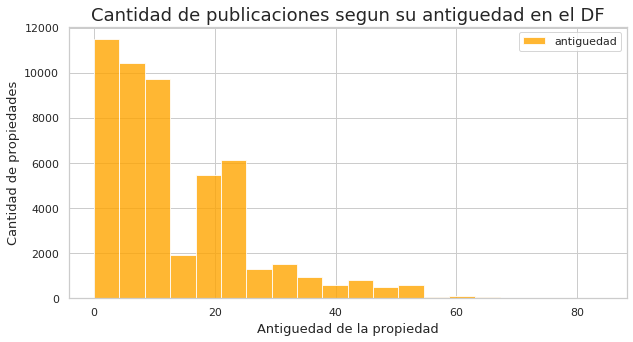

In [50]:
g = df_ant.plot.hist(bins=20, color="orange", alpha = 0.80, figsize =(10,5))
g.set_title("Cantidad de publicaciones segun su antiguedad en el DF", fontsize=18)
g.set_xlabel("Antiguedad de la propiedad", fontsize=13)
g.set_ylabel("Cantidad de propiedades", fontsize=13)

In [18]:
ant_metros_totales = data.dropna(subset=['metrostotales'])[['antiguedad', 'metrostotales']]
ant_metros_totales['groups']=pd.cut(ant_metros_totales.antiguedad,[0,10,20,30,40,50,60,80], precision = 1, include_lowest=True)
ant_metros_totales

,antiguedad,metrostotales,groups
1,13.0,180.0,"(10.0, 20.0]"
2,6.0,166.0,"(-0.1, 10.0]"
3,5.0,67.0,"(-0.1, 10.0]"
4,10.0,95.0,"(-0.1, 10.0]"
5,7.0,90.0,"(-0.1, 10.0]"
...,...,...,...
239993,2.0,150.0,"(-0.1, 10.0]"
239994,6.0,90.0,"(-0.1, 10.0]"
239996,2.0,250.0,"(-0.1, 10.0]"
239997,21.0,138.0,"(20.0, 30.0]"


Text(0, 0.5, 'Metros totales')

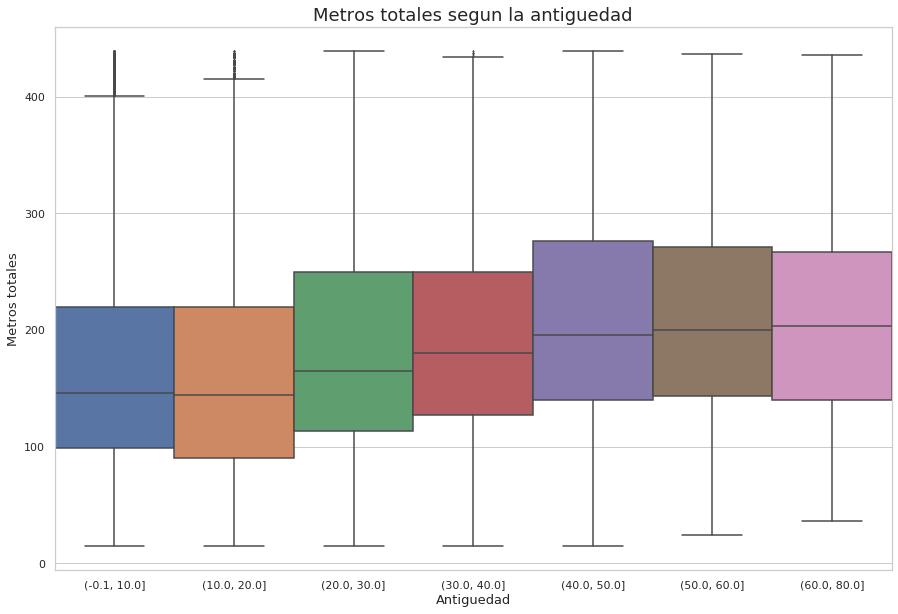

In [19]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x = ant_metros_totales['groups'], y=ant_metros_totales['metrostotales'], width=1, fliersize =1)
ax.set_title("Metros totales segun la antiguedad", fontsize=18)
ax.set_xlabel("Antiguedad", fontsize=13)
ax.set_ylabel("Metros totales", fontsize=13)

In [31]:
ant_tipo = data.dropna(subset=['tipodepropiedad'])[['tipodepropiedad', 'antiguedad']]
ant_tipo['count'] = 1
ant_tipo['groups'] = pd.cut(ant_tipo.antiguedad, [0,10,20,30,40,50,60,80], precision = 1, include_lowest=True)
ant_tipo = ant_tipo.drop(columns='antiguedad').rename(columns={'groups':'antiguedad'}).pivot_table(index='tipodepropiedad', columns='antiguedad', values='count', aggfunc='count')
ant_tipo = ant_tipo.applymap(lambda x: np.log(x))
ant_tipo.head()

antiguedad,"(-0.1, 10.0]","(10.0, 20.0]","(20.0, 30.0]","(30.0, 40.0]","(40.0, 50.0]","(50.0, 60.0]","(60.0, 80.0]"
tipodepropiedad,,,,,,,
Apartamento,10.400255,9.080004,8.410053,7.168580,6.354370,5.398163,4.043051
Bodega comercial,6.498282,5.700444,4.770685,3.401197,2.484907,1.609438,0.000000
Casa,11.294458,10.027518,9.272940,8.064636,7.271009,6.356108,4.997212
Casa en condominio,9.404920,7.953318,6.922644,5.420535,3.663562,2.302585,1.098612
Casa uso de suelo,5.288267,5.141664,4.859812,3.637586,3.912023,3.135494,1.945910


Text(66.49999999999999, 0.5, 'Tipo de propiedad')

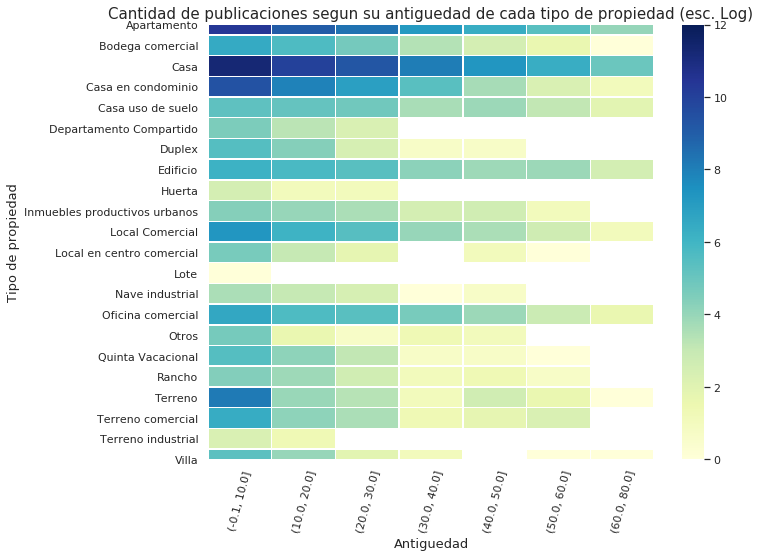

In [33]:
plt.figure(figsize=(10,8))
g = sns.heatmap(ant_tipo, vmin = 0, vmax=12, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Cantidad de publicaciones segun su antiguedad de cada tipo de propiedad (esc. Log)", fontsize=15)
g.set_xlabel("Antiguedad", fontsize=13)
g.set_ylabel("Tipo de propiedad", fontsize=13)

In [36]:
ant_habitaciones = data[['antiguedad', 'habitaciones']]
ant_habitaciones = ant_habitaciones.dropna()

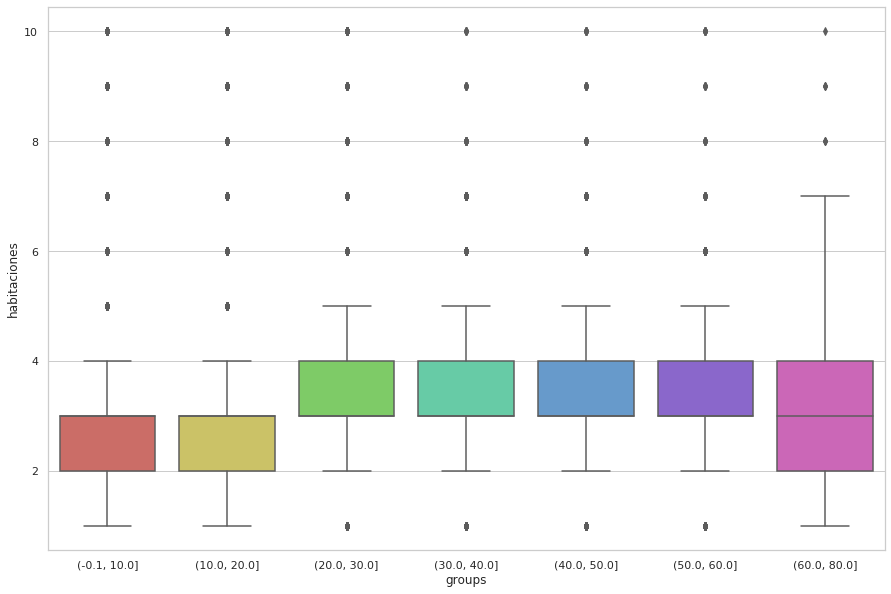

In [40]:
plt.figure(figsize=(15,10))
ant_habitaciones['groups'] = pd.cut(ant_habitaciones.antiguedad, [0,10,20,30,40,50,60,80], precision = 1, include_lowest=True)
ant_habitaciones.head()
g = sns.boxplot(x="groups", y="habitaciones", data=ant_habitaciones, palette="hls")

In [41]:
ant_prov = data.dropna(subset=['provincia'])[['provincia', 'antiguedad']]
ant_prov['count'] = 1
ant_prov['groups'] = pd.cut(ant_prov.antiguedad, [0,10,20,30,40,50,60,80], precision = 1, include_lowest=True)
ant_prov = ant_prov.drop(columns='antiguedad').rename(columns={'groups':'antiguedad'}).pivot_table(index='provincia', columns='antiguedad', values='count', aggfunc='count')
ant_prov = ant_prov.applymap(lambda x: np.log(x))
ant_prov.head()

antiguedad,"(-0.1, 10.0]","(10.0, 20.0]","(20.0, 30.0]","(30.0, 40.0]","(40.0, 50.0]","(50.0, 60.0]","(60.0, 80.0]"
provincia,,,,,,,
Aguascalientes,6.952729,5.918894,4.510860,3.401197,1.386294,0.000000,0.0
Baja California Norte,7.715124,6.047372,3.433987,1.791759,0.000000,1.386294,NaN
Baja California Sur,7.265430,4.605170,3.367296,1.098612,1.098612,NaN,0.0
Campeche,5.075174,3.258097,2.397895,0.693147,NaN,NaN,NaN
Chiapas,6.658011,5.153292,3.713572,2.197225,1.609438,0.693147,NaN


Text(66.5, 0.5, 'Provincia')

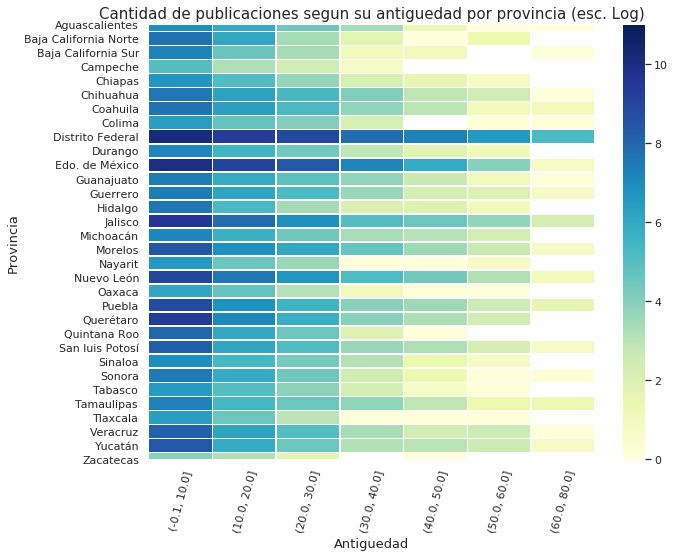

In [42]:
plt.figure(figsize=(10,8))
g = sns.heatmap(ant_prov, vmin = 0, vmax=11, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Cantidad de publicaciones segun su antiguedad por provincia (esc. Log)", fontsize=15)
g.set_xlabel("Antiguedad", fontsize=13)
g.set_ylabel("Provincia", fontsize=13)

In [43]:
ant_cercanias = data[data["antiguedad"] <= 5.0]
ant_cercanias = ant_cercanias[["antiguedad", "gimnasio", "usosmultiples", "escuelascercanas", "centroscomercialescercanos"]].reset_index(drop=True)
ant_cercanias = ant_cercanias.drop(columns=["antiguedad"])
ant_cercanias.head(2)

,gimnasio,usosmultiples,escuelascercanas,centroscomercialescercanos
0,False,False,True,True
1,False,False,False,False


In [44]:
ant_cercanias_t = ant_cercanias[ant_cercanias[["gimnasio", "usosmultiples", "escuelascercanas", "centroscomercialescercanos"]] == True]
ant_cercanias_t = ant_cercanias_t.count().reset_index()
ant_cercanias_t = ant_cercanias_t.rename(columns={"index":"beneficios", 0:"cantidad"})
ant_cercanias_t

,beneficios,cantidad
0,gimnasio,9060
1,usosmultiples,7953
2,escuelascercanas,45819
3,centroscomercialescercanos,40785


Text(0, 0.5, 'Cantidad')

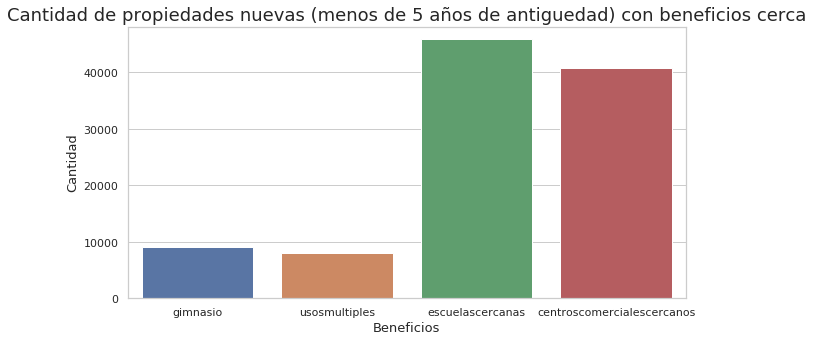

In [45]:
plt.figure(figsize=(10,5))
g = sns.barplot(x = "beneficios", y = "cantidad", data = ant_cercanias_t)
g.set_title("Cantidad de propiedades nuevas (menos de 5 años de antiguedad) con beneficios cerca", fontsize=18)
g.set_xlabel("Beneficios", fontsize=13)
g.set_ylabel("Cantidad",fontsize=13 )